In [1]:
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model


import warnings
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel(r'C:\Users\User\Dropbox\PC\Downloads\dry_beans\Dry_Bean_Dataset\Dry_Bean_Dataset.xlsx')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#Check if there is any missing or NAN values in our dataset
data.isna().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [4]:
#standardise our numerical data 
#Using StandardScaler() function from sklearn we can standardise each our columns that contains numerical data

# Copying original dataframe
data_ready =data.copy()

scaler = preprocessing.StandardScaler()
num_cols = data.drop('Class', axis=1)
num_cols=num_cols.columns
data_ready[num_cols] = scaler.fit_transform(data[num_cols])

data_ready.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


In [5]:
# label_encoder object knows how to understand word labels
#Encode columns with string values,machine understands numbers better than strings hence it is importsnt we encode string to numbers
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Class' ,since in this case this is the only column with string values
data_ready['Class']= label_encoder.fit_transform(data_ready['Class'])
data_ready.to_excel('data_redy.xlsx')

Decision Tree Accuracy: 72.906
Decision Tree F1 Score: 0.695
Decision Tree ROC_AUC: 0.834


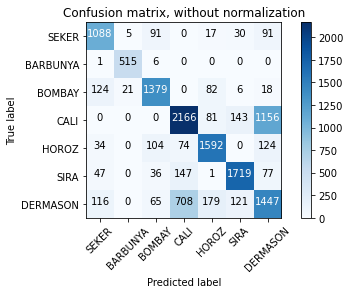

In [ ]:
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
#     print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)
    class_names = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI','HOROZ','SIRA','DERMASON']
    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
#     plt.figure()
#     generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
#     plt.show()

y =data_ready['Class']
X = data_ready.drop('Class', axis=1)

# create models
dt_clf = DecisionTreeClassifier(criterion='entropy')
rfor = RandomForestClassifier()
neigh = KNeighborsClassifier(n_neighbors=1) 
logreg_clf = linear_model.LogisticRegression()
mlpc = MLPClassifier()
gnb = GaussianNB()

kf = 10

MODELS={'Decision Tree':dt_clf,'Random Forest':rfor,'KNeighbors':neigh,'Logistic Regression':logreg_clf,
        'MLP':mlpc,'GaussianNB':gnb}
for model in MODELS:
    scores1A = cross_val_score(MODELS[model], X, y, scoring='accuracy', cv=kf, n_jobs=-1)
    scores1F = cross_val_score(MODELS[model], X, y, scoring='f1_weighted', cv=kf, n_jobs=-1)
    scores1R = cross_val_score(MODELS[model], X, y, scoring='roc_auc_ovr_weighted', cv=kf, n_jobs=-1)
    
    print(model+' Accuracy: %.3f' % (np.mean(scores1A)*100))
    print(model+' F1 Score: %.3f' % (np.mean(scores1F)))
    print(model+' ROC_AUC: %.3f' % (np.mean(scores1R)))
    y_predDT = cross_val_predict(MODELS[model], X, y, cv=10)
    plot_confusion_matrix(y_predDT, y)
    print()

In [ ]:
#We have fitted various Machine Learning models above and evaluated each of them 
#All our models have good accuaracies and Area under the curve close to one meaning our models have a  which means it has a good measure of separability
#Logistic Regression has the highest accuracy and Area Under Curve